In [ ]:
import numpy as np # библиотека расширенной математики
import matplotlib as mp # библиотека рисования растровых графиков
from matplotlib import pyplot as plt # создаём короткий псевдоним


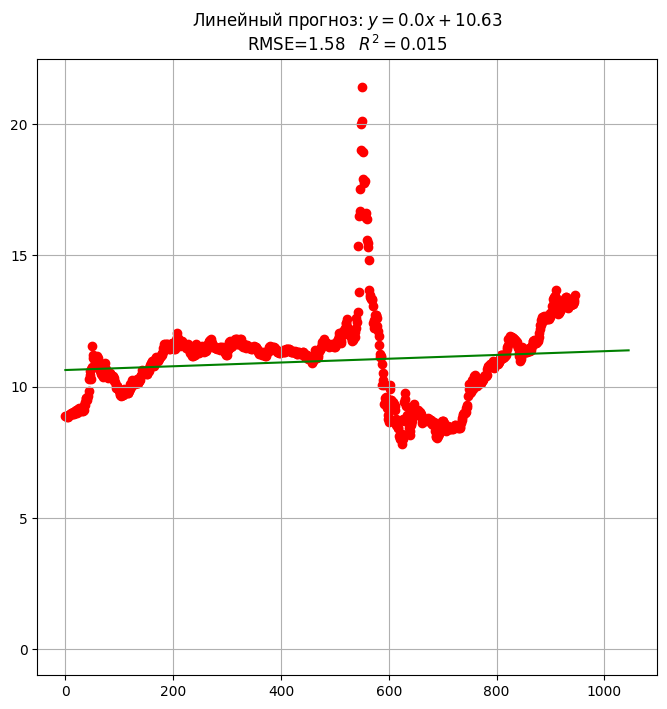

In [ ]:
X=[] # создаем пустой массив аргументов X
Y=[] # создаем пустой массив значений Y
R=[] # создаем пустой массив значений уравнения регрессии
i = 0 # задаём начальное значение X
data = open('CNYRUB_TOM5.csv') # открываем файл на чтение
while True: # до тех пор пока файл не закончится
    line = data.readline() # считываем строку
    if not line: # если не удалось (закончился файл)
        data.close() # закрываем файл
        break # и прерываем цикл чтения
    else: # если удалось (файл ещё не закончился)
        X.append(i) # добавляем значение в массив аргументов
        Y.append(float(line)) # добавляем значение функции в массив
        i = i + 1 # увеличиваем значение аргумента
n = np.size(X) # определяем размер выборки
xm = np.mean(X) # среднее аргумента
ym = np.mean(Y) # среднее значений
Sxy = Sxx = SE = ST = 0 # суммы произведений, квадратов и т.д.
for i in range(n): # для всех элементов выборки
    Sxy = Sxy + X[i]*Y[i] # считаем сумму произведений XY
    Sxx = Sxx + X[i]*X[i] # считаем сумму квадратов X
a = (Sxy-n*xm*ym)/(Sxx-n*xm*xm) # считаем коэффициент наклона
b = ym - a * xm # считаем высоту над осью OX
for i in range(n): # для всех элементов выборки
    R.append(a * X[i] + b) # значение уравнения регрессии
for i in range(100): # для ста новых элементов выборки
    X.append(n+i) # добавляем значение X в массив аргументов
    R.append(a * X[n+i] + b) # значение уравнения регрессии

for i in range(n): # для всех элементов выборки
    SE = SE + (Y[i]-R[i])*(Y[i]-R[i]) # сумма квадратов отклонений от регрессии
    ST = ST + (Y[i]-ym)*(Y[i]-ym) # сумма квадратов отклонений от среднего
RMSE = (SE/(n-1))**0.5 # уточнённая среднеквадратичная ошибка
r2=1-(SE/ST) # коэффициент детерминации
t = 'Линейный прогноз:'+'$\;y=$'+str(int(a*100)/100)+'$x+'+str(int(b*100)/100)+'$\n'
t = t + 'RMSE='+str(int(RMSE*100)/100)+'$\;\;\;R^2=$'+str(int(r2*1000)/1000)
fig, ax = plt.subplots(figsize = (8, 8)) # график, размер в десятках процентов экрана
ax.plot(X, R, c = 'g') # нарисовать зелёный график значений регрессии
ax.scatter(X[:n], Y[:n], c ='r') # построить точки значений выборки красного цвета
ax.grid() # нарисовать координатную сетку
ax.set_title(t) # подписать заголовок графика
ax.set_xlim(0-int(len(X)*0.05), len(X)*1.05) # ограничить отображение по оси X
ax.set_ylim(0-int(max(Y)*0.05), max(Y)*1.05) # ограничить отображение по оси Y
plt.show() # показать, что получилось
